# HW 5 
## Problem 1
### (a)
Implement Algorithm 7.1.
The following code implements it, and it can return the total number of evaluations and check whether the result is convergent or divergent.

In [37]:

import scipy
import numpy as np
import matplotlib.pyplot as plt

# define Hessian matrix for Rosenbrock
def Hessian(x):
    n = int(len(x))
    H = np.zeros((n,n))

    H[0,0] = 1200*(x[0]**2)-400*x[1]+2
    H[0,1] = -400*(x[0])

    for i in range(1,n-1):

        H[i,i-1] = -400*x[i-1]
        H[i,i] = 1200*(x[i]**2)-400*x[i+1]+202
        H[i,i+1] = -400*x[i]
    
    H[n-1,n-2] = -400*x[n-2]
    H[n-1,n-1] = 200

    return H


# define Gradient for Rosenbrock

def Gradient_Rosenbrock(x):
    n = int(len(x))
    G = np.zeros(n)
    G[0] = 400*(x[0]**3)-400*x[0]*x[1]+2*x[0]-2
    for i in range(1,n-1):
        G[i] = 200*x[i] - 200*(x[i-1]**2) + 400*(x[i]**3) - 400*x[i]*x[i+1] + 2*x[i] - 2

    G[n-1] = 200*(x[n-1] - (x[n-2]**2))

    return G

# define function value of Rosenbrock

def f_Rosenbrock(x):
    f = 0
    n = int(len(x))

    for i in range(n-1):
        f = f + 100*(x[i+1] - (x[0]**2))**2 + (x[i] - 1)**2
    

    return f


# combine above parameters

def Rosenbrock(x):
    return f_Rosenbrock(x),Gradient_Rosenbrock(x),Hessian(x)

# Backtracking
def step_length_Rosenbrock(f_x,g,X,p):
    alpha = 1
    rho = 0.8
    c_1 = 0.5
    x_new = X + alpha*p
    
    f_x_new = f_Rosenbrock(x_new)
    
    special_count = 1
    
    while(f_x_new > (f_x + c_1*alpha*np.dot(g,p))):
        alpha = rho*alpha
        x_new = X + alpha*p
        f_x_new = f_Rosenbrock(x_new)
        special_count = special_count + 1

        if(special_count == 6):
            alpha = 1
            return alpha,special_count
    return alpha,special_count

def newton_ls_cg(x_in,tol,iter):
    X = x_in
    X_old = x_in
    n = 0
    f_x,g,B = Rosenbrock(X)
    number_evaluate = 0
    while(n < iter and np.linalg.norm(g) > tol):
        f_x,g,B = Rosenbrock(X)

        p = 0

        tol_k = np.minimum(0.5,np.sqrt(np.linalg.norm(g)))*np.linalg.norm(g)
        z = 0
        r = g
        d = -r

        j = 0
        while(True):
            if(j > 20):
                p = -g
                break
            if(d.T @ B @ d <= 0):
                if(j == 0):
                    p = -g
                    break
                else:
                    p = z
                    break
            alpha = np.matmul(r,r)/(d.T @ B @ d)
            z = z + alpha*d
            r_new = r + alpha*(B @ d)
            if (np.linalg.norm(r_new) < tol_k):
                p = z
                break
            beta = np.matmul(r_new,r_new)/np.matmul(r,r)
            d = -r_new + beta*d
            j = j + 1

        n = n + 1
            
        alpha_ls,counts = step_length_Rosenbrock(f_x,g,X,p)
        X_old = X
        X = X + alpha_ls*p
        
        number_evaluate = number_evaluate + 3 + counts
    
    converge = 1
    if(np.linalg.norm(X_old - X) > 0.01):
        converge = 0

    return X,number_evaluate,converge





evaluate_list= np.zeros(170)
whether_converge_list = np.zeros(170)

x_list = np.arange(30,200)

for i in x_list:
    x = 2*np.ones(i)
    X,evaluate_list[i-30],whether_converge_list[i-30] = newton_ls_cg(x,10**(-3),200)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


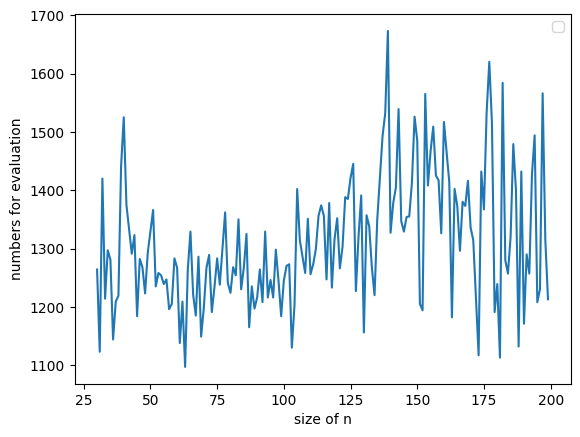

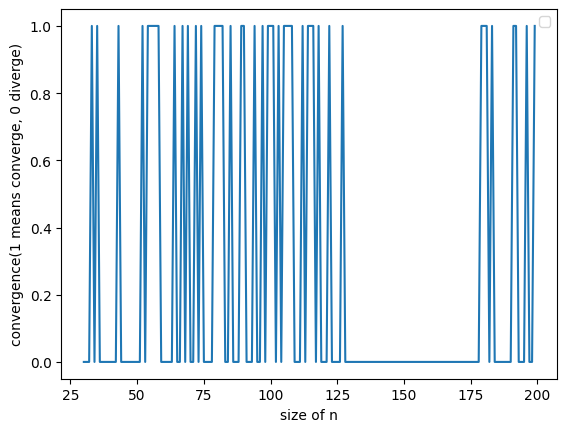

In [38]:
plt.plot(x_list,evaluate_list)
plt.xlabel('size of n')
plt.ylabel('numbers for evaluation')
plt.legend()
plt.figure()
plt.plot(x_list, whether_converge_list)
plt.xlabel('size of n')
plt.ylabel('convergence(1 means converge, 0 diverge)')
plt.legend()

### (b)

Here use Gradient to check the convergence rate

In [43]:
def newton_ls_cg_b(x_in,tol,iter):
    X = x_in
    X_old = x_in
    n = 0
    f_x,g,B = Rosenbrock(X)
    g_old = g
    while(n < iter and np.linalg.norm(g) > tol):
        f_x,g,B = Rosenbrock(X)

        p = 0

        tol_k = np.minimum(0.5,np.sqrt(np.linalg.norm(g)))*np.linalg.norm(g)
        z = 0
        r = g
        d = -r

        j = 0
        while(True):
            if(j > 20):
                p = -g
                break
            if(d.T @ B @ d <= 0):
                if(j == 0):
                    p = -g
                    break
                else:
                    p = z
                    break
            alpha = np.matmul(r,r)/(d.T @ B @ d)
            z = z + alpha*d
            r_new = r + alpha*(B @ d)
            if (np.linalg.norm(r_new) < tol_k):
                p = z
                break
            beta = np.matmul(r_new,r_new)/np.matmul(r,r)
            d = -r_new + beta*d
            j = j + 1

        n = n + 1
            
        alpha_ls,counts = step_length_Rosenbrock(f_x,g,X,p)
        g_old = Gradient_Rosenbrock(X_old)
        X_old = X
        X = X + alpha_ls*p

    measure = np.linalg.norm(g)/np.linalg.norm(g_old)
    return measure

In [46]:
A = 2*np.ones(120)

print(newton_ls_cg_b(A,10*(-3),200))

0.29628889854448404


Here from the small example we get one $0.29$ convergence rate, which is not superlinear.

## Problem 2
### (a)
Implement Algorithm 7.2 for Rosenbrock Function

In [132]:
def trust_region_cg(x_in,tol,nabla):
    n = 0
    X = x_in
    f_x,g,B = Rosenbrock(X)
    Tol = tol
    number_evaluate = 0

    z = np.zeros(len(x_in))
    p = np.zeros(len(x_in))
    r = g
    d = -r

        

    
    if(np.linalg.norm(r) < Tol):
        return p,1
            
    while(True):

        j = 0

        if(j > 20):
            p = -g
            break

        if(d.T @ B @ d <= 0):
            tao = (-2*(d @ z) + np.sqrt(4*(d @ z)**2 - 4*(z @ z - nabla**2)*(d @ d)))/(2*(d @ d))
            p = z + tao*d
            break
        
        alpha = (r.T @ r)/(d.T @ B @ d)

        
        z_new = z + alpha*d

        if(np.linalg.norm(z_new) >= nabla):
            tao = (-2*(d @ z) + np.sqrt(4*(d @ z)**2 - 4*(z @ z - nabla**2)*(d @ d)))/(2*(d @ d))
            p = z + tao*d
            break
        r_new = r + alpha*(B @ d)

        if(np.linalg.norm(r_new) < Tol):
            p = z_new
            break

        beta = (r_new @ r_new)/(r @ r)
        d = -r_new + beta*d
        j = j + 1
        r = r_new
        z = z_new

    
    
    

    return p,number_evaluate

In [71]:
# Define quadratic model m_k
def m_k(x,p):
    f_x,g,h = Rosenbrock(x)

    m = f_x + np.dot(g,p) + 0.5*(p.T @ h @ p)

    return m

In [138]:
def Trust_Region(x,niter,eps):
    k = 0
    number_evaluation = 0

    delta_max = 0.5
    delta = delta_max

    g = Gradient_Rosenbrock(x)
    number_evaluation = number_evaluation + 1
    x_old = x

    
    while(k < niter and np.linalg.norm(g) > eps):
        p,counts = trust_region_cg(x,eps,delta)
        
        
        number_evaluation = number_evaluation + 3 + counts
    
        x_old = x
        x_new = x + p

        f_x = f_Rosenbrock(x)


        f_x_new = f_Rosenbrock(x_new)
        number_evaluation = number_evaluation + 2

        rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))
        number_evaluation = number_evaluation + 2

        if rho < 0.25:
            delta = delta/4
        elif rho > 0.75 and np.linalg.norm(p) == delta:
            delta = np.minimum((2*delta),delta_max)

        if rho > 0.25:
            x = x_new

        k = k + 1
    
    converge = 1
    if(np.linalg.norm(x_old - x) > 0.01):
        converge = 0

    return x,number_evaluation,converge

In [139]:
A = 2*np.ones(10)
print(Trust_Region(A,200,10**(-6)))

(array([1.24775017, 1.30464159, 1.32415985, 1.32903733, 1.32959586,
       1.32959586, 1.3318718 , 1.36034941, 1.52996224, 2.20391625]), 1401, 1)


/tmp/ipykernel_320/3822452445.py:28: RuntimeWarning: invalid value encountered in double_scalars
  rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))


In [140]:
evaluate_list= np.zeros(170)
whether_converge_list = np.zeros(170)

x_list = np.arange(30,200)

for i in x_list:
    x = 2*np.ones(i)
    X,evaluate_list[i-30],whether_converge_list[i-30] = Trust_Region(x,200,10**(-6))

/tmp/ipykernel_320/3822452445.py:28: RuntimeWarning: invalid value encountered in double_scalars
  rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


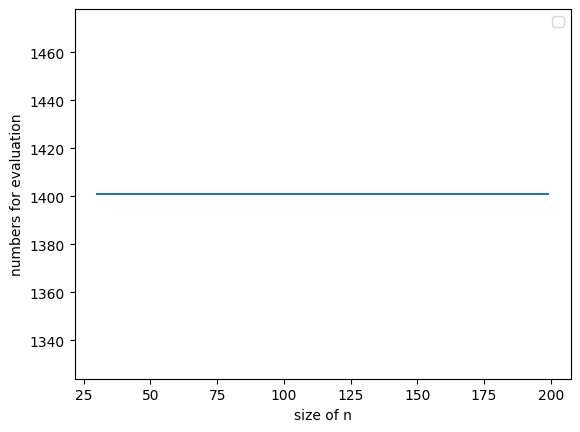

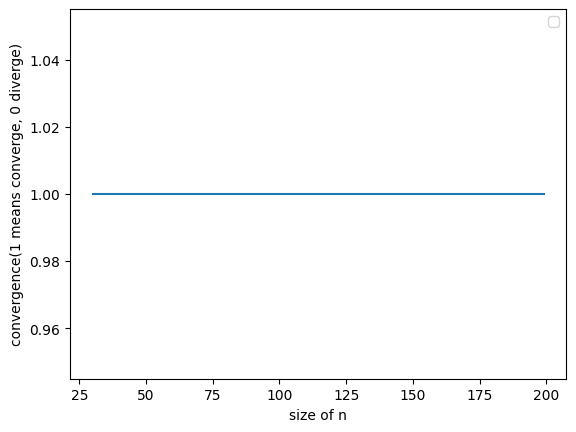

In [141]:
plt.plot(x_list,evaluate_list)
plt.xlabel('size of n')
plt.ylabel('numbers for evaluation')
plt.legend()
plt.figure()
plt.plot(x_list, whether_converge_list)
plt.xlabel('size of n')
plt.ylabel('convergence(1 means converge, 0 diverge)')
plt.legend()

### (b)
Apply the algorithm to Perturb Rosenberg


In [142]:
def Perturb_Hessian(x):
    n = int(len(x))
    H = np.zeros((n,n))

    H[0,0] = 1200*(x[0]**2)-400*x[1]+2+(1/50)
    H[0,1] = -400*(x[0]) + (1/50)

    for i in range(1,n-1):

        H[i,i-1] = -400*x[i-1] + (1/50)
        H[i,i] = 1200*(x[i]**2)-400*x[i+1]+202 + (1/50)
        H[i,i+1] = -400*x[i] + (1/50)
    
    H[n-1,n-2] = -400*x[n-2] + (1/50)
    H[n-1,n-1] = 200 + (1/50)

    return H


# define Gradient for Rosenbrock

def Perturb_Gradient_Rosenbrock(x):
    n = int(len(x))
    G = np.zeros(n)
    G[0] = 400*(x[0]**3)-400*x[0]*x[1]+2*x[0]-2+(1/50)*x[0]
    for i in range(1,n-1):
        G[i] = 200*x[i] - 200*(x[i-1]**2) + 400*(x[i]**3) - 400*x[i]*x[i+1] + 2*x[i] - 2+(1/50)*x[i]

    G[n-1] = 200*(x[n-1] - (x[n-2]**2))+(1/50)*x[n-1]

    return G

# define function value of Rosenbrock

def Perturb_f_Rosenbrock(x):
    f = 0
    n = int(len(x))

    for i in range(n-1):
        f = f + 100*(x[i+1] - (x[i]**2))**2 + (x[i] - 1)**2+(1/100)*x[i]**2
    

    return f


# combine above parameters

def Perturb_Rosenbrock(x):
    return Perturb_f_Rosenbrock(x),Perturb_Gradient_Rosenbrock(x),Perturb_Hessian(x)



In [143]:
def Perturb_trust_region_cg(x_in,tol,nabla):
    n = 0
    X = x_in
    f_x,g,B = Perturb_Rosenbrock(X)
    Tol = tol
    number_evaluate = 0

    z = np.zeros(len(x_in))
    p = np.zeros(len(x_in))
    r = g
    d = -r

        

    
    if(np.linalg.norm(r) < Tol):
        return p,1
            
    while(True):

        j = 0

        if(j > 20):
            p = -g
            break

        if(d.T @ B @ d <= 0):
            tao = (-2*(d @ z) + np.sqrt(4*(d @ z)**2 - 4*(z @ z - nabla**2)*(d @ d)))/(2*(d @ d))
            p = z + tao*d
            break
        
        alpha = (r.T @ r)/(d.T @ B @ d)

        
        z_new = z + alpha*d

        if(np.linalg.norm(z_new) >= nabla):
            tao = (-2*(d @ z) + np.sqrt(4*(d @ z)**2 - 4*(z @ z - nabla**2)*(d @ d)))/(2*(d @ d))
            p = z + tao*d
            break
        r_new = r + alpha*(B @ d)

        if(np.linalg.norm(r_new) < Tol):
            p = z_new
            break

        beta = (r_new @ r_new)/(r @ r)
        d = -r_new + beta*d
        j = j + 1
        r = r_new
        z = z_new

    
    
    

    return p,number_evaluate

In [144]:
def Perturb_Trust_Region(x,niter,eps):
    k = 0
    number_evaluation = 0

    delta_max = 0.5
    delta = delta_max

    g = Perturb_Gradient_Rosenbrock(x)
    number_evaluation = number_evaluation + 1
    x_old = x

    
    while(k < niter and np.linalg.norm(g) > eps):
        p,counts = Perturb_trust_region_cg(x,eps,delta)
        
        
        number_evaluation = number_evaluation + 3 + counts
    
        x_old = x
        x_new = x + p

        f_x = Perturb_f_Rosenbrock(x)


        f_x_new = Perturb_f_Rosenbrock(x_new)
        number_evaluation = number_evaluation + 2

        rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))
        number_evaluation = number_evaluation + 2

        if rho < 0.25:
            delta = delta/4
        elif rho > 0.75 and np.linalg.norm(p) == delta:
            delta = np.minimum((2*delta),delta_max)

        if rho > 0.25:
            x = x_new

        k = k + 1
    
    converge = 1
    if(np.linalg.norm(x_old - x) > 0.01):
        converge = 0

    return x,number_evaluation,converge

In [145]:
evaluate_list= np.zeros(170)
whether_converge_list = np.zeros(170)

x_list = np.arange(30,200)

for i in x_list:
    x = 2*np.ones(i)
    X,evaluate_list[i-30],whether_converge_list[i-30] = Perturb_Trust_Region(x,200,10**(-6))

/tmp/ipykernel_320/3263274266.py:28: RuntimeWarning: invalid value encountered in double_scalars
  rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))
/tmp/ipykernel_320/3263274266.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


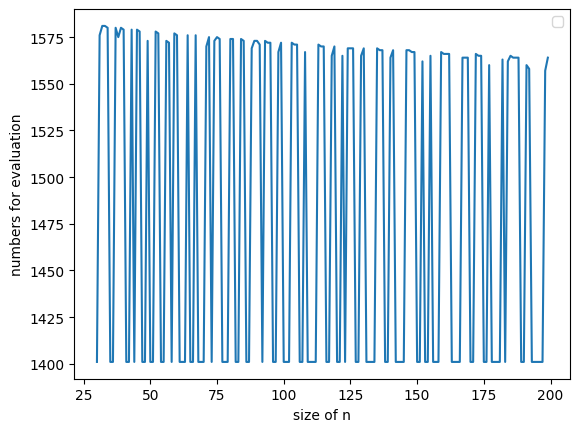

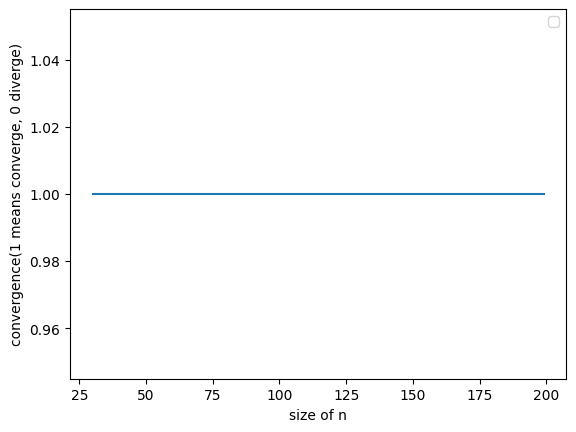

In [146]:
plt.plot(x_list,evaluate_list)
plt.xlabel('size of n')
plt.ylabel('numbers for evaluation')
plt.legend()
plt.figure()
plt.plot(x_list, whether_converge_list)
plt.xlabel('size of n')
plt.ylabel('convergence(1 means converge, 0 diverge)')
plt.legend()

### (c)

Use the gradient to check the convergence rate

In [148]:
def Convergence_Trust_Region(x,niter,eps):
    k = 0
    number_evaluation = 0

    delta_max = 0.5
    delta = delta_max

    g = Gradient_Rosenbrock(x)
    g_old = g
    number_evaluation = number_evaluation + 1
    x_old = x

    
    while(k < niter and np.linalg.norm(g) > eps):
        p,counts = trust_region_cg(x,eps,delta)
        
        
        number_evaluation = number_evaluation + 3 + counts
    
        x_old = x
        g_old = Gradient_Rosenbrock(x_old)
        x_new = x + p
        g = Gradient_Rosenbrock(x_new)

        f_x = f_Rosenbrock(x)


        f_x_new = f_Rosenbrock(x_new)
        number_evaluation = number_evaluation + 2

        rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))
        number_evaluation = number_evaluation + 2

        if rho < 0.25:
            delta = delta/4
        elif rho > 0.75 and np.linalg.norm(p) == delta:
            delta = np.minimum((2*delta),delta_max)

        if rho > 0.25:
            x = x_new

        k = k + 1
    
    rate = np.linalg.norm(g)/np.linalg.norm(g_old)

    return rate

In [147]:
def Convergence_Perturb_Trust_Region(x,niter,eps):
    k = 0
    number_evaluation = 0

    delta_max = 0.5
    delta = delta_max

    g = Perturb_Gradient_Rosenbrock(x)
    g_old = g
    number_evaluation = number_evaluation + 1
    x_old = x

    
    while(k < niter and np.linalg.norm(g) > eps):
        p,counts = Perturb_trust_region_cg(x,eps,delta)
        
        
        number_evaluation = number_evaluation + 3 + counts
    
        x_old = x
        g_old = Perturb_Gradient_Rosenbrock(x_old)
        x_new = x + p
        g = Perturb_Gradient_Rosenbrock(x_new)

        f_x = Perturb_f_Rosenbrock(x)


        f_x_new = Perturb_f_Rosenbrock(x_new)
        number_evaluation = number_evaluation + 2

        rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))
        number_evaluation = number_evaluation + 2

        if rho < 0.25:
            delta = delta/4
        elif rho > 0.75 and np.linalg.norm(p) == delta:
            delta = np.minimum((2*delta),delta_max)

        if rho > 0.25:
            x = x_new

        k = k + 1

    rate = np.linalg.norm(g)/np.linalg.norm(g_old)

    return rate

In [149]:
A = 2*np.ones(120)

print(Convergence_Trust_Region(A,200,10**(-6)))
print(Convergence_Perturb_Trust_Region(A,200,10**(-6)))

/tmp/ipykernel_320/358199203.py:31: RuntimeWarning: invalid value encountered in double_scalars
  rho = (f_x - f_x_new)/(m_k(x,np.zeros(len(p))) - m_k(x,p))


1.0
0.9999999999996312


So both of them are not superlinearly convergent.